<a href="https://colab.research.google.com/github/maha022000/MAHALAKSHMI/blob/Data-science--projects/Decision_Tree_Using_the_CART_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: Decision Tree Using the CART Algorithm
You are given a dataset, “car_evaluation.csv.” Load the dataset into a
DataFrame without the header and rename the columns as the list given here -
['buying', 'maint', 'doors', 'persons', 'lug_boot',
'safety', 'class']. Considering the class column as the target
variable, perform the following tasks:
1. Explore the target column, class (our task is to predict how the car features
affect the class of car as Very good, Good, Acceptable, or Unacceptable,
which is why we have considered this column as the target column)
2. Declare feature vectors and the target variable
3. Split the data into test and train fragments using the
train_test_split() function in an 80:20 ratio (80% train and 20% test)
4. Encode all the ordinal data into numeric values using the
category_encoders library
5. Predicting the test results using a Decision Tree Classifier based on Gini Index
criteria
6. Check the accuracy score of the model based on the Gini Index
7. Visualize the decision tree using Graphviz
8. Show how the importance of features affects the target variable
2
9. State the results and conclusion 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
df = pd.read_csv("car_evaluation.csv", header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Performing initial analyzing of the dataset.

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Renaming the columns

In [ ]:
col_names = ['buying', 'maintainance', 'doors', 'persons', 'luggage_capacity', 'safety', 'class']


df.columns = col_names

col_names

['buying',
 'maintainance',
 'doors',
 'persons',
 'luggage_capacity',
 'safety',
 'class']

In [ ]:
df.head()

,buying,maintainance,doors,persons,luggage_capacity,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


 Counting the frequency of categorical variables.

In [ ]:
#Counting the frequency of each categorical variable in the dataset
col_names = ['buying', 'maintainance', 'doors', 'persons', 'luggage_capacity', 'safety', 'class']
print("Counting the frequency of each categorical variable in the dataset")
for col in col_names:
    
    print(df[col].value_counts())

Counting the frequency of each categorical variable in the dataset
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintainance, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: luggage_capacity, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
df

,buying,maintainance,doors,persons,luggage_capacity,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Exploring the class variable which is also our target variable.

In [ ]:
#Explore class variable
print("Frequency of each ordinal data in the target column  class:")
df['class'].value_counts()

Frequency of each ordinal data in the target column  class:


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
# check missing values in variables

df.isnull().sum()

buying              0
maintainance        0
doors               0
persons             0
luggage_capacity    0
safety              0
class               0
dtype: int64

 Declaring the feature vector and the target variable.

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
print("Feature vectors are:")
X.head()

Feature vectors are:


,buying,maintainance,doors,persons,luggage_capacity,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
print("Target column is:")
y.head()

Target column is:


0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

Splitting the data into test and train in 80:20 ratio.

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

 Encoding the categorical data - Feature Engineerng.

In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.5 MB/s eta 0:00:00


In [ ]:
#import category encoders
import category_encoders as ce

# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maintainance', 'doors', 'persons', 'luggage_capacity', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maintainance,doors,persons,luggage_capacity,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [ ]:
X_test.head()

,buying,maintainance,doors,persons,luggage_capacity,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


 Predicting the test results using Decision tree classifier based on Gini index criteria.

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc

 Check accuracy score of the model based on gini index.

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8179


 Visualizing the discion tree using Graphviz.

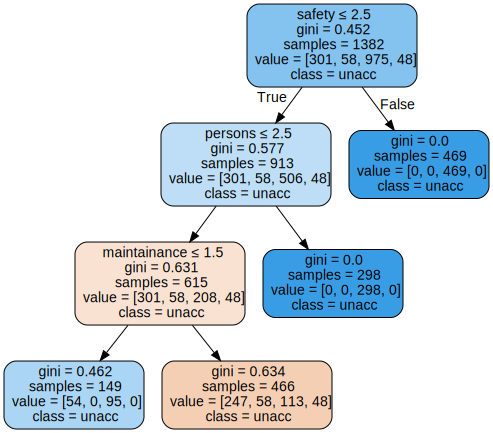

In [ ]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

 Identifying the most important features that effect the target variable.

In [ ]:
#Selecting only the important features
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(clf_gini.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
features

,Features,Importance
3,persons,0.534
5,safety,0.374
1,maintainance,0.091
0,buying,0.000
2,doors,0.000
4,luggage_capacity,0.000
